Анастасия, Добрый день! Проделали большую работу по анализу двух выборок. Статистический анализ данных, это важный этап в анализе данных. И очень важно разобраться с применением тестов в той или иной ситуации. Плюсы работы: - Выполнена проверка на нормальность - Хорошо оформлен код - Сделаны хорошие выводы по анализу - Заменили пропуск медианным значением - Работу представили через GitHub Комментарии к работе: 1. Тест на нормальность стоило выполнять для каждой выборки отдельно. Из-за этого получили неверные результаты теста и соответственно весь анализ неверен. Так как использовались тесты для нормального распределения обеих выборок, хотя одна из выборок распределена не нормально. Оценка не была снижена, так как в этом примере даже при применении параметрических тестов получился верный результат по гипотезам. 2. Так как одна из выборок распределена не нормально, то стоило выбрать коэффициент корреляции Спирмена. И построить тепловую карту корреляции признаков. 3. Для сравнения выборок необходимо использовать Непараметрические тесты. Выбираем тест U- критерий Манна-Уитни, так как в наших выборках малое количество наблюдений. Полезные материалы по теме: https://nafi.ru/upload/spss/Lection_6.pdf https://machinelearningmastery.ru/statistical-hypothesis-tests-in-python-cheat-sheet/ https://machinelearningmastery.ru/nonparametric-statistical-significance-tests-in-python/ https://habr.com/ru/articles/444124/ https://www.codecamp.ru/blog/mann-whitney-u-test-python/ https://www.notion.so/EDA-47f6a8964de4434c9fcfa9170bccd03e Отзыв приготовила ментор Белоглазова Ольга. Если возникнут вопросы, можете обратиться в канал # м_03_eda_4 в Пачке, постараемся на всё ответить и разобраться с моментами, которые вызывают трудности. Удачи в обучении!

# Домашнее задание блока EDA-4. Статистические тесты

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.

 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.

In [10]:
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

import seaborn as sns

In [3]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, None]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]

df_data = {'petersburg':(petersburg),'magadan':(magadan)}
mussels_df = pd.DataFrame(df_data)

mussels_df = mussels_df.fillna(mussels_df['petersburg'].median()) #заполним недостающее значение медианным значением по выборке

display(mussels_df)

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1016,0.0689


## Проверяем данные на нормальность

***Выдвенем гипотезы для признака 'petersburg':***

$H_{0}$: в нашем датафрейме размеры мидий в Санкт-Петербурге распределены нормально

$H_{a}$: в нашем датафрейме размеры мидий в Санкт-Петербурге не распределены нормально (не подтвердили $H_{0}$)

Проверим нулевую гипотезу с помощью теста Шапиро-Уилка.

In [5]:
alpha = 0.05

p = round(shapiro(mussels_df['petersburg'])[1], 3)
print(f'p-value = {p}')

if p > alpha:
    print(f'{p} > {alpha}: нулевая гипотеза подтвердилась, распределение данных похоже на нормальное')
else:
    print(f'{p} <= {alpha}: данные не распределены нормально, отбрасываем нулевую гипотезу')

p-value = 0.106
0.106 > 0.05: нулевая гипотеза подтвердилась, распределение данных похоже на нормальное


***Выдвенем гипотезы для признака 'magadan':***

$H_{0}$: в нашем датафрейме размеры мидий в Магадане распределены нормально

$H_{a}$: в нашем датафрейме размеры мидий в Магадане не распределены нормально (не подтвердили $H_{0}$)

Проверим нулевую гипотезу с помощью теста Шапиро-Уилка.

In [6]:
alpha = 0.05

p = round(shapiro(mussels_df['magadan'])[1], 3)
print(f'p-value = {p}')

if p > alpha:
    print(f'{p} > {alpha}: нулевая гипотеза подтвердилась, распределение данных похоже на нормальное')
else:
    print(f'{p} <= {alpha}: данные не распределены нормально, отбрасываем нулевую гипотезу')

p-value = 0.036
0.036 <= 0.05: данные не распределены нормально, отбрасываем нулевую гипотезу


## Проверяем данные на наличие корреляции

Поскольку данные для Магадана распределены не нормально и содержат количестенные значения, будем проверять коэффициент корреляции Спирмена.

In [7]:
mussels_df.corr(method='spearman')

,petersburg,magadan
petersburg,1.000000,0.155691
magadan,0.155691,1.000000


<Axes: >

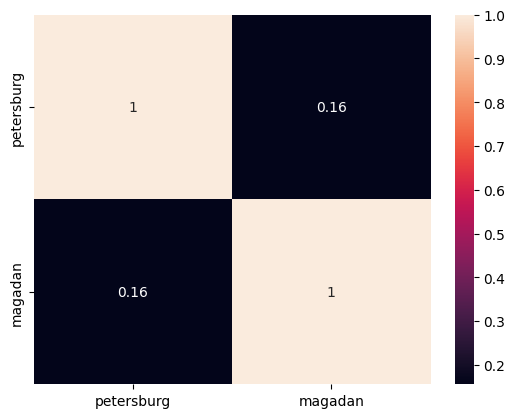

In [9]:
sns.heatmap(mussels_df.corr(method='spearman'), annot=True)

## Вывод

Получили, что размеры мидий в наших совокупностях (мидии из Санкт-Петербурга и мидии из Магадана) распределены нормально только для одного признака и между совокупностями есть статистически значимые отличия (нет корреляции). Чтобы оценить отличие двух совокупностей используем критерий Уилкоксона.

## Сравним выборки

Для сравнения используем U-критерий Манна-Уитни, так как выборка для Магадана имеет не нормальное распределение, выборки независимы и сравниваем всего 2 выборки.

***Выдвенем гипотезы:***

$H_{0}$: распределения выборок равны

$H_{1}$: распределения выборок не равны

In [13]:
alpha = 0.05
p = mannwhitneyu(mussels_df['petersburg'],mussels_df['magadan'])[1]

if p > alpha:
    print(f'{round(p,2)} > {alpha}: распределения выборок равны')
else:
    print(f'{round(p,2)} <= {alpha}: распределения выборок не равны (можем отклонить нулевую гипотезу)')

0.01 <= 0.05: распределения выборок не равны (можем отклонить нулевую гипотезу)


Так как U-критерий Манна-Уитни подтвердил наличие разницы двух выборок размеров мидий, сосчитаем разницу в средних размерах раковин мидий из городов Санкт-Петербург и Магадан, а также медианную разницу между этими выборками.

In [14]:
mean_diff = mussels_df['petersburg'].mean() - mussels_df['magadan'].mean()
print('Разница в средних значениях размеров раковин мидий из Санкт-Петербурга и Магадана:', round(mean_diff, 3))

median_diff = mussels_df['petersburg'].median() - mussels_df['magadan'].median()
print('Разница в медианных размерах раковин мидий из Санкт-Петербурга и Магадана:', round(median_diff, 3))

Разница в средних значениях размеров раковин мидий из Санкт-Петербурга и Магадана: 0.025
Разница в медианных размерах раковин мидий из Санкт-Петербурга и Магадана: 0.029


## Вывод

Исходя из проведенных исследований определили, что размеры мидий для Санкт-петербурга распределены нормально, а для Магадана - нет, при этом есть разница в размерах мидий в зависимости от города их отлова. Благодаря U-критерию Манна-Уитни определелили, что распределения выборок не равны. После подсчета разницы в средних и медианных размерах раковин мидий из двух городов, выяснили, что в Санкт-Петербурге раковины мидий больше примерно на 0.029. Размер мидий зависит от солености воды, но соленость Балтийского моря меньше, чем у Охотского моря, значит мидии из Магадана должны быть больше, а мы получили обратные данные. Это может говорить о излишнем опреснении моря или о излишней интенсивности вылова мидий.